In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from text_analysis import Decomposer

In [22]:
cad = pd.read_csv('data\\BD_Linhas-de-Transmissão(Cadastro).csv', encoding='latin', sep=';')
med = pd.read_csv('data\\BD_Linhas-de-Transmissão(Documentos de Medição).csv', encoding='latin', sep=';', dtype=object)


med[['Valor teórico',
     'LimInfIntMed.',
     'LimSupIntMed.',
     'ValMed/PosTCont']] = med[['Valor teórico',
     'LimInfIntMed.',
     'LimSupIntMed.',
     'ValMed/PosTCont']].replace({r'\.':'',',':'.'}, regex=True)
     
med[['Valor teórico',
     'LimInfIntMed.',
     'LimSupIntMed.',
     'ValMed/PosTCont']] = med[['Valor teórico',
     'LimInfIntMed.',
     'LimSupIntMed.',
     'ValMed/PosTCont']].astype(float)
     
med[['Equipamento',
     'Ponto medição',
     'Doc.medição']] = med[['Equipamento',
     'Ponto medição',
     'Doc.medição']].astype(int)
     
med['Data'] = pd.to_datetime(med['Data'], dayfirst=True)


cad[['Latitude', 'Longitude']] = cad[['Latitude', 'Longitude']].replace({r'\.':'',',':'.', '#N/D': 'NaN'}, regex=True)

cad[['Latitude', 'Longitude']] = cad[['Latitude', 'Longitude']].astype(float)

cad[['Equipamento', 'Tensão']] = cad[['Equipamento', 'Tensão']].astype(int)

In [23]:
med = med.rename(columns={'Doc.medição':'DocMed',
                    'Item medição': 'ItemMed',
                    'Valor teórico': 'ValTeorico',
                    'LimInfIntMed.': 'InfLim',
                    'LimSupIntMed.': 'SupLim',
                    'ValMed/PosTCont': 'ValMed',
                    'Unid.caracter.': 'Unidade',
                    'Cód.valorização': 'Codigo',
                    'Txt.code codif.': 'TXTCod',
                    'Denominação': 'Denom'})

cad = cad.rename(columns={'Linha de Transmissão': 'Linha',
                    'Denominação': 'Nome',
                    'Dt.entr.serviço': 'DtEntrada',
                    'Código ABC': 'ABC',
                    'Tensão': 'Tensao'})

In [24]:
dt = med.loc[med['ItemMed'] == 'LOCALIZAÇÃO DA TORRE']
dt = pd.merge(dt, cad, how='left', on='Equipamento').drop(columns=['Unidade'])

In [25]:
dec = Decomposer()
txt = dec.create(dt['TXTCod'])

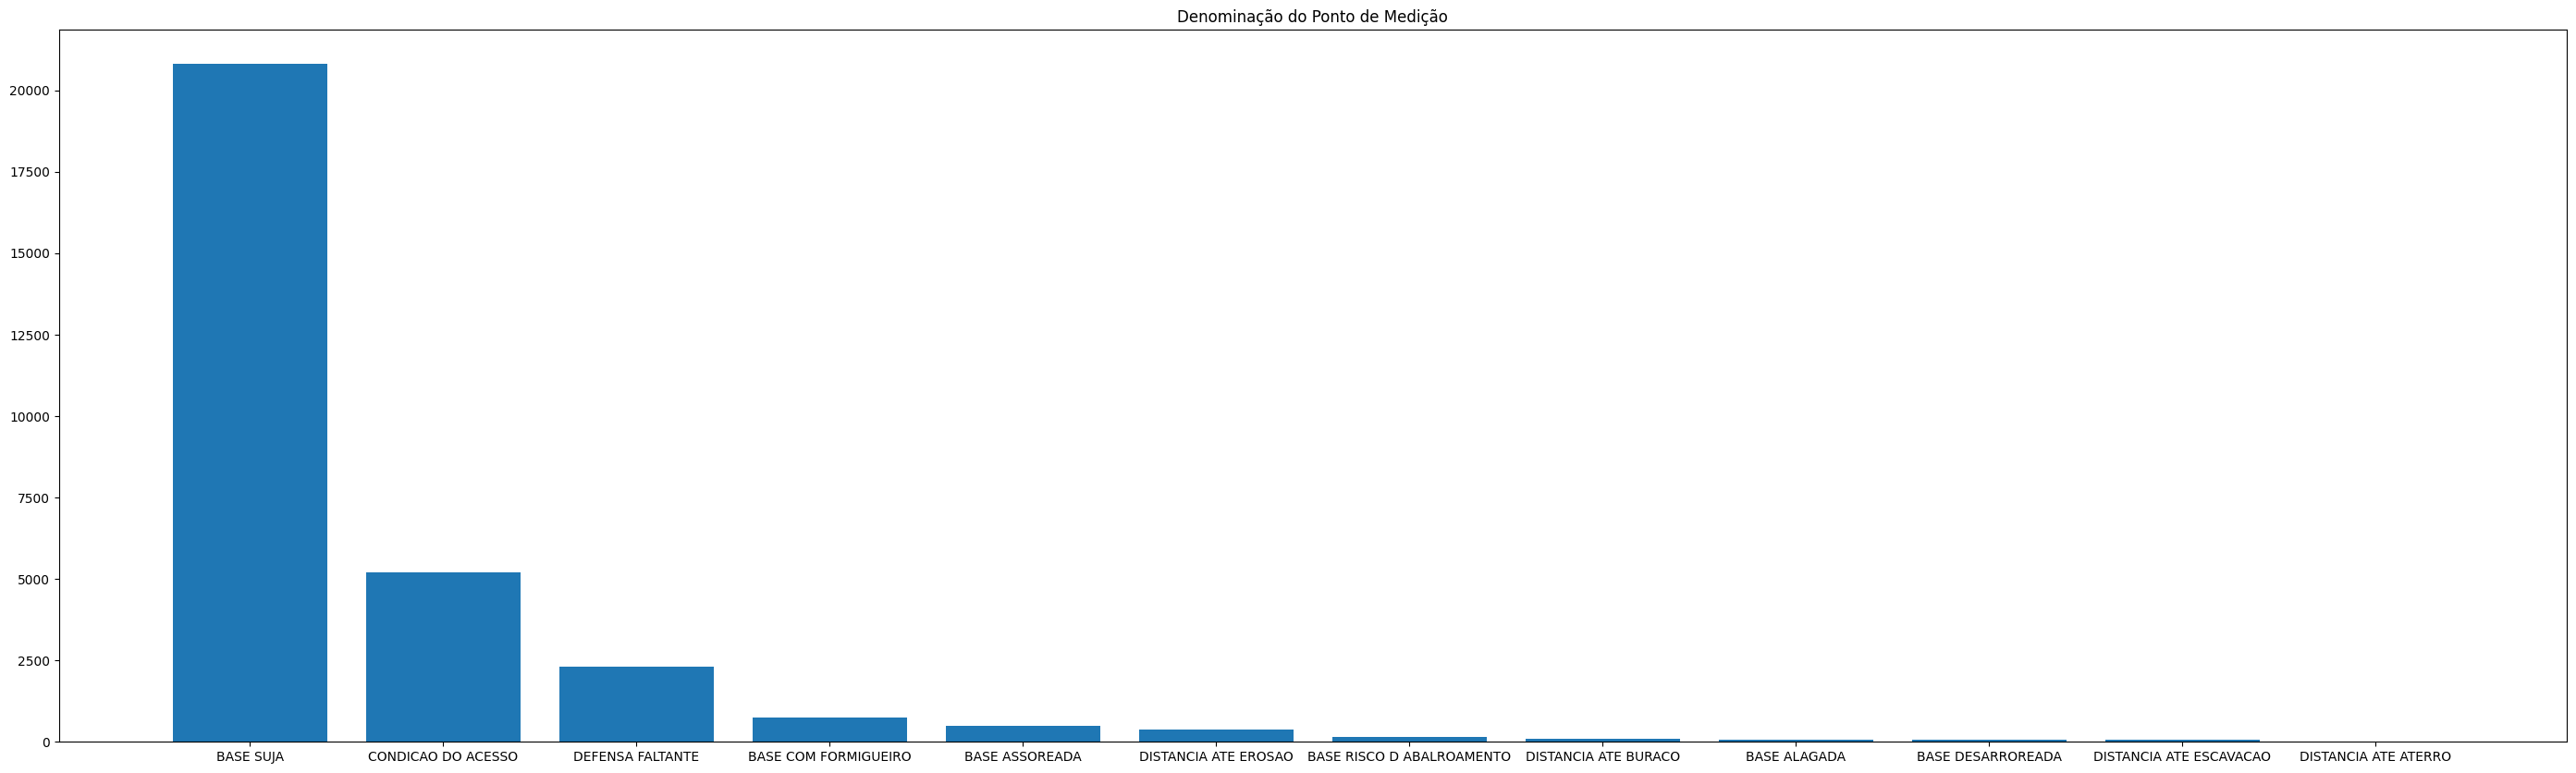

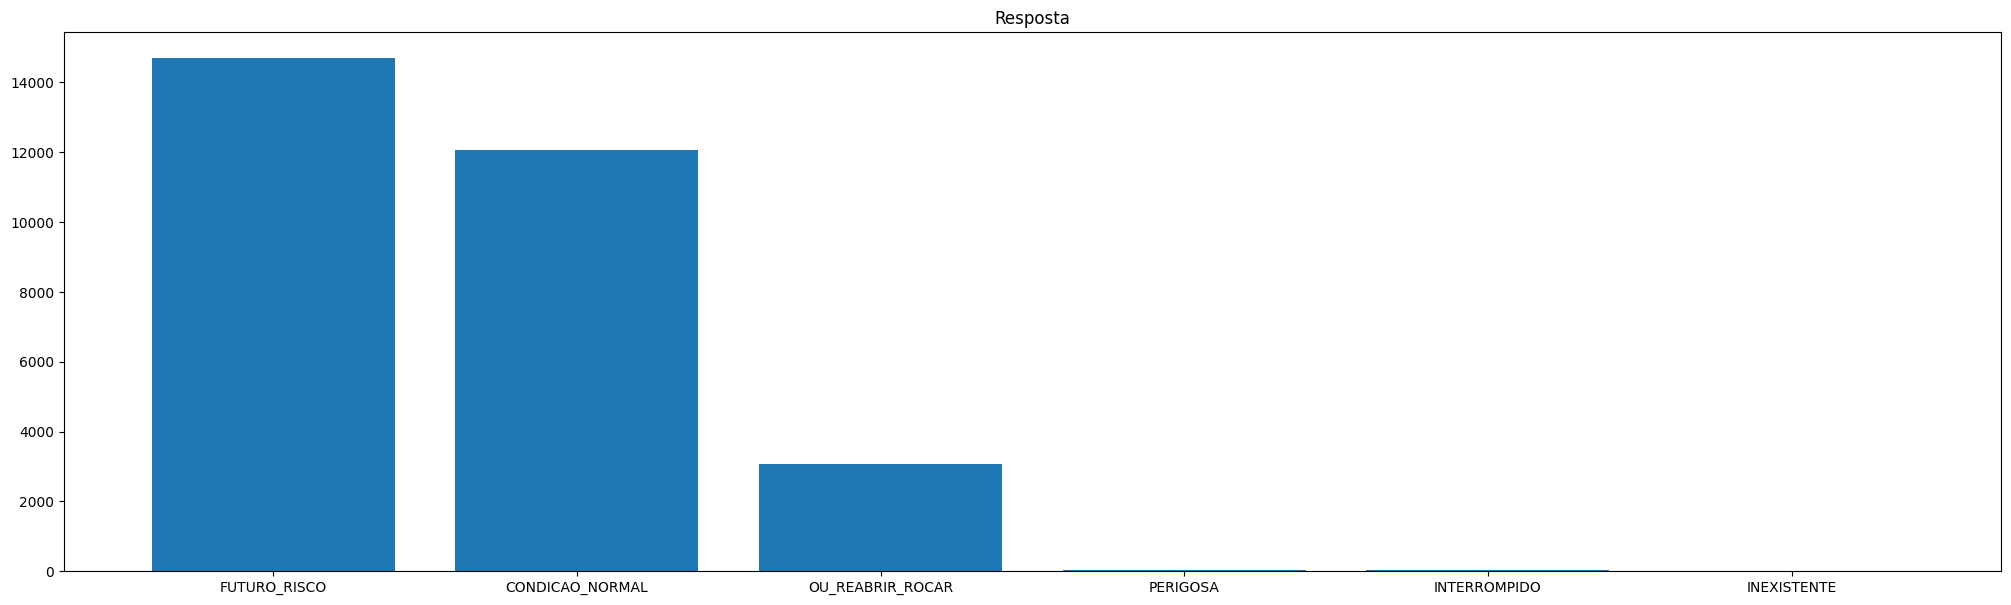

In [26]:
fig = plt.figure(figsize=(35,10))
plt.bar(dt['Denom'].value_counts().index, dt['Denom'].value_counts())
plt.title('Denominação do Ponto de Medição')
plt.show()
fig = plt.figure(figsize=(25,7))
plt.bar(txt.sum().sort_values(ascending=False).index, txt.sum().sort_values(ascending=False))
plt.title('Resposta')
plt.show()

In [27]:
# quantidade por denomicação
display(pd.merge(dt['Denom'], txt, left_index=True, right_index=True)
        .groupby('Denom').sum().style)

# proporção
display(pd.merge(dt['Denom'], txt, left_index=True, right_index=True)
        .groupby('Denom').agg(lambda x: x.sum()/x.count())
        .style.format('{:.2f}').background_gradient(axis=None, vmin=0, vmax=1, cmap="GnBu"))

# número com ABC
display(dt.groupby(['Denom','ABC']).size().unstack(fill_value=0)
        .style.format('{:.2f}').background_gradient(axis=None, vmin=0, vmax=1, cmap="GnBu"))

# proporção ABC
display(dt.groupby(['Denom','ABC']).size().unstack(fill_value=0).apply(lambda x: x/x.sum(), axis=1)
        .style.format('{:.2f}').background_gradient(axis=None, vmin=0, vmax=1, cmap="GnBu"))

,FUTURO_RISCO,OU_REABRIR_ROCAR,INTERROMPIDO,INEXISTENTE,CONDICAO_NORMAL,PERIGOSA
Denom,,,,,,
BASE ALAGADA,42.000000,0.000000,0.000000,0.000000,30.000000,0.000000
BASE ASSOREADA,278.000000,0.000000,0.000000,0.000000,196.000000,2.000000
BASE COM FORMIGUEIRO,423.000000,0.000000,0.000000,0.000000,308.000000,1.000000
BASE DESARROREADA,37.000000,0.000000,0.000000,0.000000,32.000000,0.000000
BASE RISCO D ABALROAMENTO,66.000000,0.000000,0.000000,0.000000,63.000000,0.000000
BASE SUJA,12026.000000,0.000000,0.000000,0.000000,8363.000000,29.000000
CONDICAO DO ACESSO,0.000000,3076.000000,32.000000,12.000000,2077.000000,0.000000
DEFENSA FALTANTE,1529.000000,0.000000,0.000000,0.000000,774.000000,1.000000
DISTANCIA ATE ATERRO,5.000000,0.000000,0.000000,0.000000,6.000000,0.000000


,FUTURO_RISCO,OU_REABRIR_ROCAR,INTERROMPIDO,INEXISTENTE,CONDICAO_NORMAL,PERIGOSA
Denom,,,,,,
BASE ALAGADA,0.55,0.00,0.00,0.00,0.39,0.00
BASE ASSOREADA,0.58,0.00,0.00,0.00,0.41,0.00
BASE COM FORMIGUEIRO,0.57,0.00,0.00,0.00,0.41,0.00
BASE DESARROREADA,0.54,0.00,0.00,0.00,0.46,0.00
BASE RISCO D ABALROAMENTO,0.49,0.00,0.00,0.00,0.46,0.00
BASE SUJA,0.58,0.00,0.00,0.00,0.40,0.00
CONDICAO DO ACESSO,0.00,0.59,0.01,0.00,0.40,0.00
DEFENSA FALTANTE,0.66,0.00,0.00,0.00,0.33,0.00
DISTANCIA ATE ATERRO,0.42,0.00,0.00,0.00,0.50,0.00


ABC,B,C
Denom,,
BASE ALAGADA,14.00,62.00
BASE ASSOREADA,59.00,419.00
BASE COM FORMIGUEIRO,94.00,649.00
BASE DESARROREADA,9.00,60.00
BASE RISCO D ABALROAMENTO,12.00,124.00
BASE SUJA,7504.00,13315.00
CONDICAO DO ACESSO,3924.00,1290.00
DEFENSA FALTANTE,1005.00,1308.00
DISTANCIA ATE ATERRO,2.00,10.00


ABC,B,C
Denom,,
BASE ALAGADA,0.18,0.82
BASE ASSOREADA,0.12,0.88
BASE COM FORMIGUEIRO,0.13,0.87
BASE DESARROREADA,0.13,0.87
BASE RISCO D ABALROAMENTO,0.09,0.91
BASE SUJA,0.36,0.64
CONDICAO DO ACESSO,0.75,0.25
DEFENSA FALTANTE,0.43,0.57
DISTANCIA ATE ATERRO,0.17,0.83
